**Meinisa - meinisa271@gmail.com**



## ANALYSIS IN REAL DATA

### 1. DATA OVERVIEW

In [75]:
import pandas as pd

gamesession = pd.read_csv("/content/gamesession.csv")
clips = pd.read_csv("/content/clips.csv")
downloaded_clips = pd.read_csv("/content/downloaded_clips.csv")
shared_clips = pd.read_csv("/content/shared_clips.csv")
premium = pd.read_csv("/content/premium.csv")

In [76]:
gamesession.head()

,id,user_id,duration,submited_date,created_at,game_name,join_at
0,96886552,2580232,7163086,2023-06-01 18:06:00,2023-05-19 06:36:39,Other Games,2023-02-24 13:59:30
1,97882905,3198820,7249588,2023-06-05 05:09:28,2023-05-21 09:49:01,League of Legends,2023-04-27 21:48:57
2,98018265,2989826,34588468,2023-06-02 13:43:37,2023-05-21 14:56:00,Other Games,2023-02-28 20:27:40
3,98339228,2646193,16245921,2023-06-04 16:30:52,2023-05-22 10:20:35,Other Games,2023-05-01 22:20:31
4,98382750,4583871,11063831,2023-06-04 09:27:22,2023-05-22 11:56:36,Halo Infinite,2023-01-04 15:27:07


In [77]:
clips.head()

,id,user_id,gamesession_Id,clip_type_id,duration,event_name,game_name,created_at,join_at
0,134469944895,3095890,103039886.0,5,60,High Comment,Other Games,2023-06-01 12:00:21,2023-01-29 15:16:25
1,134470123490,3095890,103039886.0,5,60,High Comment,Other Games,2023-06-01 12:00:45,2023-01-29 15:16:25
2,134470573860,2844164,100738061.0,2,10,NaN,World of Warcraft,2023-06-01 12:01:47,2023-03-10 23:27:14
3,134470643745,3928914,103014694.0,1,14,Single kill,COD: Warzone3-2 & MW3-2,2023-06-01 12:01:59,2023-04-19 18:26:19
4,134470837870,3928914,103014694.0,1,14,Single kill,COD: Warzone3-2 & MW3-2,2023-06-01 12:02:30,2023-04-19 18:26:19


In [78]:
downloaded_clips.head()

,id,user_Id,clip_id,gamesession_Id,game_name,event_name,created_at,join_at
0,556784158,2844164,134463515475,100738061.0,World of Warcraft,NaN,2023-06-01 12:20:56,2023-03-10 23:27:14
1,556784256,2844164,134464540455,100738061.0,World of Warcraft,NaN,2023-06-01 12:20:57,2023-03-10 23:27:14
2,556784354,2844164,134466310875,100738061.0,World of Warcraft,NaN,2023-06-01 12:21:00,2023-03-10 23:27:14
3,556784452,2844164,134468205535,100738061.0,World of Warcraft,NaN,2023-06-01 12:21:00,2023-03-10 23:27:14
4,556784550,2844164,134469370285,100738061.0,World of Warcraft,NaN,2023-06-01 12:21:01,2023-03-10 23:27:14


In [79]:
shared_clips.head()

,user_id,clip_id,gamesession_Id,game_name,event_name,created_at,scheduled_at,join_at
0,1377027,134463197110,101121252.0,Apex Legends,NaN,2023-06-01 17:26:19,2023-06-01 22:30:00,2023-04-23 22:47:48
1,1377027,134463197110,101121252.0,Apex Legends,NaN,2023-06-01 17:27:11,2023-06-01 22:30:00,2023-04-23 22:47:48
2,4727411,133758065225,101171965.0,Other Games,NaN,2023-06-01 19:50:27,2023-06-01 19:50:27,2023-03-18 12:32:25
3,4727411,133758065225,101171965.0,Other Games,NaN,2023-06-01 19:50:28,2023-06-01 19:50:28,2023-03-18 12:32:25
4,4727411,133924026570,101171965.0,Other Games,NaN,2023-06-01 19:51:36,2023-06-01 19:51:36,2023-03-18 12:32:25


In [80]:
premium.head()

,user_id,starts_at,ends_at,created_at,updated_at,canceled_at,join_at
0,3119140,2023-01-02,2023-03-03,2023-01-03 02:12:37,2023-03-04 00:00:18,2023-02-09,2023-10-10 05:49:30
1,2921015,2023-01-04,2023-02-04,2023-01-04 07:02:52,2023-02-05 00:00:16,2023-01-09,2023-03-31 00:17:45
2,4501997,2023-01-10,2023-05-11,2023-01-11 03:11:23,2023-05-12 00:00:07,NaN,2023-08-10 00:51:44
3,845586,2023-01-15,2023-02-15,2023-01-15 12:46:50,2023-02-16 00:00:17,2023-01-15,2023-04-20 10:00:47
4,4465860,2023-01-19,2023-12-20,2023-01-20 01:20:09,2023-11-21 00:00:11,NaN,2023-07-30 10:01:48


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

datasets = {
    'Game Sessions': 'gamesession_df',
    'Clips': 'clips_df',
    'Downloaded Clips': 'downloaded_clips_df',
    'Shared Clips': 'shared_clips_df',
    'Premium': 'premium_df'
}

print("Dataset Shapes and Info:")
for name, df_name in datasets.items():
    try:
        df = globals().get(df_name)
        if df is not None:
            print(f"   • {name:15}: {df.shape[0]:,} rows × {df.shape[1]} columns")
        else:
            print(f"   • {name:15}: Not loaded - use: {df_name} = pd.read_csv('filename.csv')")
    except:
        print(f"   • {name:15}: Not available - load with pd.read_csv()")

print()

Dataset Shapes and Info:
   • Game Sessions  : 5,000 rows × 8 columns
   • Clips          : 1,032 rows × 9 columns
   • Downloaded Clips: 623 rows × 4 columns
   • Shared Clips   : 302 rows × 4 columns
   • Premium        : 150 rows × 8 columns



### 2. DATA PREPROCESSING AND CLEANING

In [59]:
def preprocess_datasets():
    global gamesession_df, clips_df, downloaded_clips_df, shared_clips_df, premium_df

    # Check if datasets exist
    if 'gamesession_df' not in globals():
        print("Datasets not found. Please load them first:")
        print("gamesession_df = pd.read_csv('gamesession.csv')")
        print("clips_df = pd.read_csv('clips.csv')")
        print("downloaded_clips_df = pd.read_csv('downloaded_clips.csv')")
        print("shared_clips_df = pd.read_csv('shared_clips.csv')")
        print("premium_df = pd.read_csv('premium.csv')")
        return False

    # Convert date columns to datetime
    date_columns = {
        'gamesession_df': ['submited_date', 'created_at', 'join_at'],
        'clips_df': ['created_at', 'join_at'],
        'downloaded_clips_df': ['created_at', 'join_at'],
        'shared_clips_df': ['created_at', 'scheduled_at', 'join_at'],
        'premium_df': ['starts_at', 'ends_at', 'created_at', 'updated_at', 'canceled_at', 'join_at']
    }

    for df_name, cols in date_columns.items():
        df = globals().get(df_name)
        if df is not None:
            for col in cols:
                if col in df.columns:
                    try:
                        df[col] = pd.to_datetime(df[col], errors='coerce')
                        print(f"   ✅ Converted {df_name}.{col} to datetime")
                    except:
                        print(f"   ⚠️  Failed to convert {df_name}.{col}")

    # Clean duration columns (convert to minutes if in milliseconds)
    if 'gamesession_df' in globals() and 'duration' in gamesession_df.columns:
        # If duration values are very large, assume milliseconds
        if gamesession_df['duration'].max() > 100000:
            gamesession_df['duration_minutes'] = gamesession_df['duration'] / 60000
            print("   ✅ Converted game session duration to minutes")
        else:
            gamesession_df['duration_minutes'] = gamesession_df['duration']

    if 'clips_df' in globals() and 'duration' in clips_df.columns:
        # Assume clips duration is in seconds
        clips_df['duration_seconds'] = pd.to_numeric(clips_df['duration'], errors='coerce')
        print("   ✅ Processed clips duration")
    return True

# Run preprocessing
preprocessing_success = preprocess_datasets()

if not preprocessing_success:
    print("\n⚠️  Please load your CSV files first, then run this analysis again.")
    print("Example:")
    print("gamesession_df = pd.read_csv('your_gamesession_file.csv')")
    exit()

   ✅ Converted gamesession_df.submited_date to datetime
   ✅ Converted clips_df.created_at to datetime
   ✅ Converted downloaded_clips_df.created_at to datetime
   ✅ Converted shared_clips_df.created_at to datetime
   ✅ Converted premium_df.starts_at to datetime
   ✅ Converted premium_df.ends_at to datetime
   ✅ Converted premium_df.canceled_at to datetime
   ✅ Converted game session duration to minutes
   ✅ Processed clips duration


### 3. EXPLORATORY DATA ANALYSIS

In [58]:
def analyze_dataset_structure():
    datasets = {
        'Game Sessions': gamesession_df,
        'Clips': clips_df,
        'Downloaded Clips': downloaded_clips_df,
        'Shared Clips': shared_clips_df,
        'Premium': premium_df
    }

    for name, df in datasets.items():
        if df is not None:
            print(f"\n{name}:")
            print(f"   Shape: {df.shape}")
            print(f"   Columns: {list(df.columns)}")
            print(f"   Null values: {df.isnull().sum().sum()}")
            print(f"   Unique users: {df['user_id'].nunique() if 'user_id' in df.columns else 'N/A'}")

            # Show data types
            print("   Data types:")
            for col, dtype in df.dtypes.items():
                print(f"      {col}: {dtype}")

analyze_dataset_structure()


Game Sessions:
   Shape: (5000, 8)
   Columns: ['id', 'user_id', 'game_name', 'duration', 'submited_date', 'user_type', 'duration_minutes', 'month']
   Null values: 0
   Unique users: 993
   Data types:
      id: int64
      user_id: int64
      game_name: object
      duration: int64
      submited_date: datetime64[ns]
      user_type: object
      duration_minutes: float64
      month: period[M]

Clips:
   Shape: (1032, 9)
   Columns: ['id', 'user_id', 'gamesession_id', 'clip_type_id', 'game_name', 'duration', 'created_at', 'month', 'duration_seconds']
   Null values: 0
   Unique users: 653
   Data types:
      id: int64
      user_id: int64
      gamesession_id: int64
      clip_type_id: int64
      game_name: object
      duration: float64
      created_at: datetime64[ns]
      month: period[M]
      duration_seconds: float64

Downloaded Clips:
   Shape: (623, 4)
   Columns: ['id', 'user_id', 'clip_id', 'created_at']
   Null values: 0
   Unique users: 458
   Data types:
      id: 

In [87]:
import pandas as pd

gamesession_df = pd.read_csv("gamesession.csv")
clips_df = pd.read_csv("clips.csv")
downloaded_clips_df = pd.read_csv("downloaded_clips.csv")
shared_clips_df = pd.read_csv("shared_clips.csv")
premium_df = pd.read_csv("premium.csv")

clip_types = {
    1: "Highlight",
    2: "Funny Moment",
    3: "Tutorial",
    4: "Epic Win",
    5: "Fail",
    1030: "High Comment"
}

# ===================== DATASET OVERVIEW =====================
print("\n📊 DATASET OVERVIEW:")
print("-" * 30)
datasets_info = {
    'Game Sessions': len(gamesession_df),
    'Clips Created': len(clips_df),
    'Downloads': len(downloaded_clips_df),
    'Shares': len(shared_clips_df),
    'Premium Users': len(premium_df)
}
for name, count in datasets_info.items():
    print(f"   • {name:15}: {count:,}")

# ===================== USER BEHAVIOR INSIGHTS =====================
print("\n👥 USER BEHAVIOR INSIGHTS:")
print("-" * 35)

total_unique_users = gamesession_df['user_id'].nunique()
avg_sessions_per_user = len(gamesession_df) / total_unique_users
most_popular_game = gamesession_df['game_name'].value_counts().index[0]
avg_session_duration = (gamesession_df['duration'] / 60000).mean()

print(f"   • Total Active Users: {total_unique_users:,}")
print(f"   • Avg Sessions/User: {avg_sessions_per_user:.1f}")
print(f"   • Most Popular Game: {most_popular_game}")
print(f"   • Avg Session Duration: {avg_session_duration:.1f} minutes")

# ===================== CONTENT CREATION PATTERNS =====================
print("\n🎬 CONTENT CREATION PATTERNS:")
print("-" * 40)

clip_creators = clips_df['user_id'].nunique()
creator_percentage = (clip_creators / total_unique_users * 100)
avg_clips_per_creator = len(clips_df) / clip_creators
most_popular_clip_type = clips_df['clip_type_id'].value_counts().index[0]

print(f"   • Users Creating Clips: {clip_creators:,} ({creator_percentage:.1f}%)")
print(f"   • Avg Clips per Creator: {avg_clips_per_creator:.1f}")
print(f"   • Most Popular Clip Type: {clip_types.get(most_popular_clip_type, most_popular_clip_type)}")

# ===================== ENGAGEMENT ANALYSIS =====================
print("\n📈 ENGAGEMENT ANALYSIS:")
print("-" * 30)

overall_download_rate = (len(downloaded_clips_df) / len(clips_df) * 100)
overall_share_rate = (len(shared_clips_df) / len(clips_df) * 100)
downloaders = downloaded_clips_df['user_Id'].nunique()
sharers = shared_clips_df['user_id'].nunique()

print(f"   • Overall Download Rate: {overall_download_rate:.1f}%")
print(f"   • Overall Share Rate: {overall_share_rate:.1f}%")
print(f"   • Active Downloaders: {downloaders:,}")
print(f"   • Active Sharers: {sharers:,}")

# ===================== PREMIUM ANALYSIS =====================
print("\n💎 PREMIUM ANALYSIS:")
print("-" * 25)

premium_users_count = len(premium_df)
premium_conversion = (premium_users_count / total_unique_users * 100)
active_premium = len(premium_df[premium_df['canceled_at'].isna()])
canceled_premium = premium_users_count - active_premium
churn_rate = (canceled_premium / premium_users_count * 100)
if "subscription_length" in premium_df.columns:
    avg_sub_length = premium_df['subscription_length'].mean()
else:
    premium_df["starts_at"] = pd.to_datetime(premium_df["starts_at"], errors="coerce")
    premium_df["ends_at"] = pd.to_datetime(premium_df["ends_at"], errors="coerce")
    premium_df["sub_length"] = (premium_df["ends_at"] - premium_df["starts_at"]).dt.days
    avg_sub_length = premium_df["sub_length"].mean()

print(f"   • Premium Conversion Rate: {premium_conversion:.1f}%")
print(f"   • Active Subscriptions: {active_premium}")
print(f"   • Canceled Subscriptions: {canceled_premium}")
print(f"   • Churn Rate: {churn_rate:.1f}%")
print(f"   • Avg Subscription Length: {avg_sub_length:.0f} days")

# ===================== TOP PERFORMING GAMES =====================
print("\n🏆 TOP PERFORMING GAMES:")
print("-" * 63)

game_stats = gamesession_df.groupby('game_name').agg({
    'user_id': 'nunique',
    'duration': lambda x: (x.mean() / 60000)
}).round(1)

game_clips = clips_df.groupby('game_name')['user_id'].nunique()
game_stats['clip_creators'] = game_clips
game_stats['clip_rate'] = (game_stats['clip_creators'] / game_stats['user_id'] * 100).round(1)
game_stats = game_stats.sort_values('user_id', ascending=False)

print("   Rank | Game                | Users | Avg Session | Clip Rate")
print("   -----|---------------------|-------|-------------|----------")
for i, (game, stats) in enumerate(game_stats.head().iterrows(), 1):
    print(f"   {i:4} | {game:19} | {stats['user_id']:5} | {stats['duration']:8.1f}m | {stats['clip_rate']:6.1f}%")

# ===================== TOP PERFORMING CONTENT TYPES =====================
print("\n🎯 TOP PERFORMING CONTENT TYPES:")
print("-" * 67)

content_performance = []
for clip_type_id, name in clip_types.items():
    clips_of_type = clips_df[clips_df['clip_type_id'] == clip_type_id]
    if len(clips_of_type) > 0:
        clip_ids = clips_of_type['id'].tolist()
        downloads = len(downloaded_clips_df[downloaded_clips_df['clip_id'].isin(clip_ids)]['clip_id'].unique())
        shares = len(shared_clips_df[shared_clips_df['clip_id'].isin(clip_ids)]['clip_id'].unique())

        download_rate = (downloads / len(clips_of_type) * 100)
        share_rate = (shares / len(clips_of_type) * 100)
        engagement_score = download_rate + share_rate

        content_performance.append({
            'type': name,
            'clips': len(clips_of_type),
            'download_rate': download_rate,
            'share_rate': share_rate,
            'engagement_score': engagement_score
        })

content_performance.sort(key=lambda x: x['engagement_score'], reverse=True)

print("   Rank | Content Type           | Clips | Download | Share | Score")
print("   -----|------------------------|-------|----------|-------|------")
for i, perf in enumerate(content_performance[:5], 1):
    print(f"   {i:4} | {perf['type']:22} | {perf['clips']:5} | {perf['download_rate']:6.1f}% | {perf['share_rate']:4.1f}% | {perf['engagement_score']:4.1f}")


📊 DATASET OVERVIEW:
------------------------------
   • Game Sessions  : 37,579
   • Clips Created  : 552,031
   • Downloads      : 12,938
   • Shares         : 5,798
   • Premium Users  : 384

👥 USER BEHAVIOR INSIGHTS:
-----------------------------------
   • Total Active Users: 4,322
   • Avg Sessions/User: 8.7
   • Most Popular Game: Other Games
   • Avg Session Duration: 344.3 minutes

🎬 CONTENT CREATION PATTERNS:
----------------------------------------
   • Users Creating Clips: 4,563 (105.6%)
   • Avg Clips per Creator: 121.0
   • Most Popular Clip Type: Highlight

📈 ENGAGEMENT ANALYSIS:
------------------------------
   • Overall Download Rate: 2.3%
   • Overall Share Rate: 1.1%
   • Active Downloaders: 1,454
   • Active Sharers: 390

💎 PREMIUM ANALYSIS:
-------------------------
   • Premium Conversion Rate: 8.9%
   • Active Subscriptions: 259
   • Canceled Subscriptions: 125
   • Churn Rate: 32.6%
   • Avg Subscription Length: 123 days

🏆 TOP PERFORMING GAMES:
--------------

### 4. VISUALIZATIONS

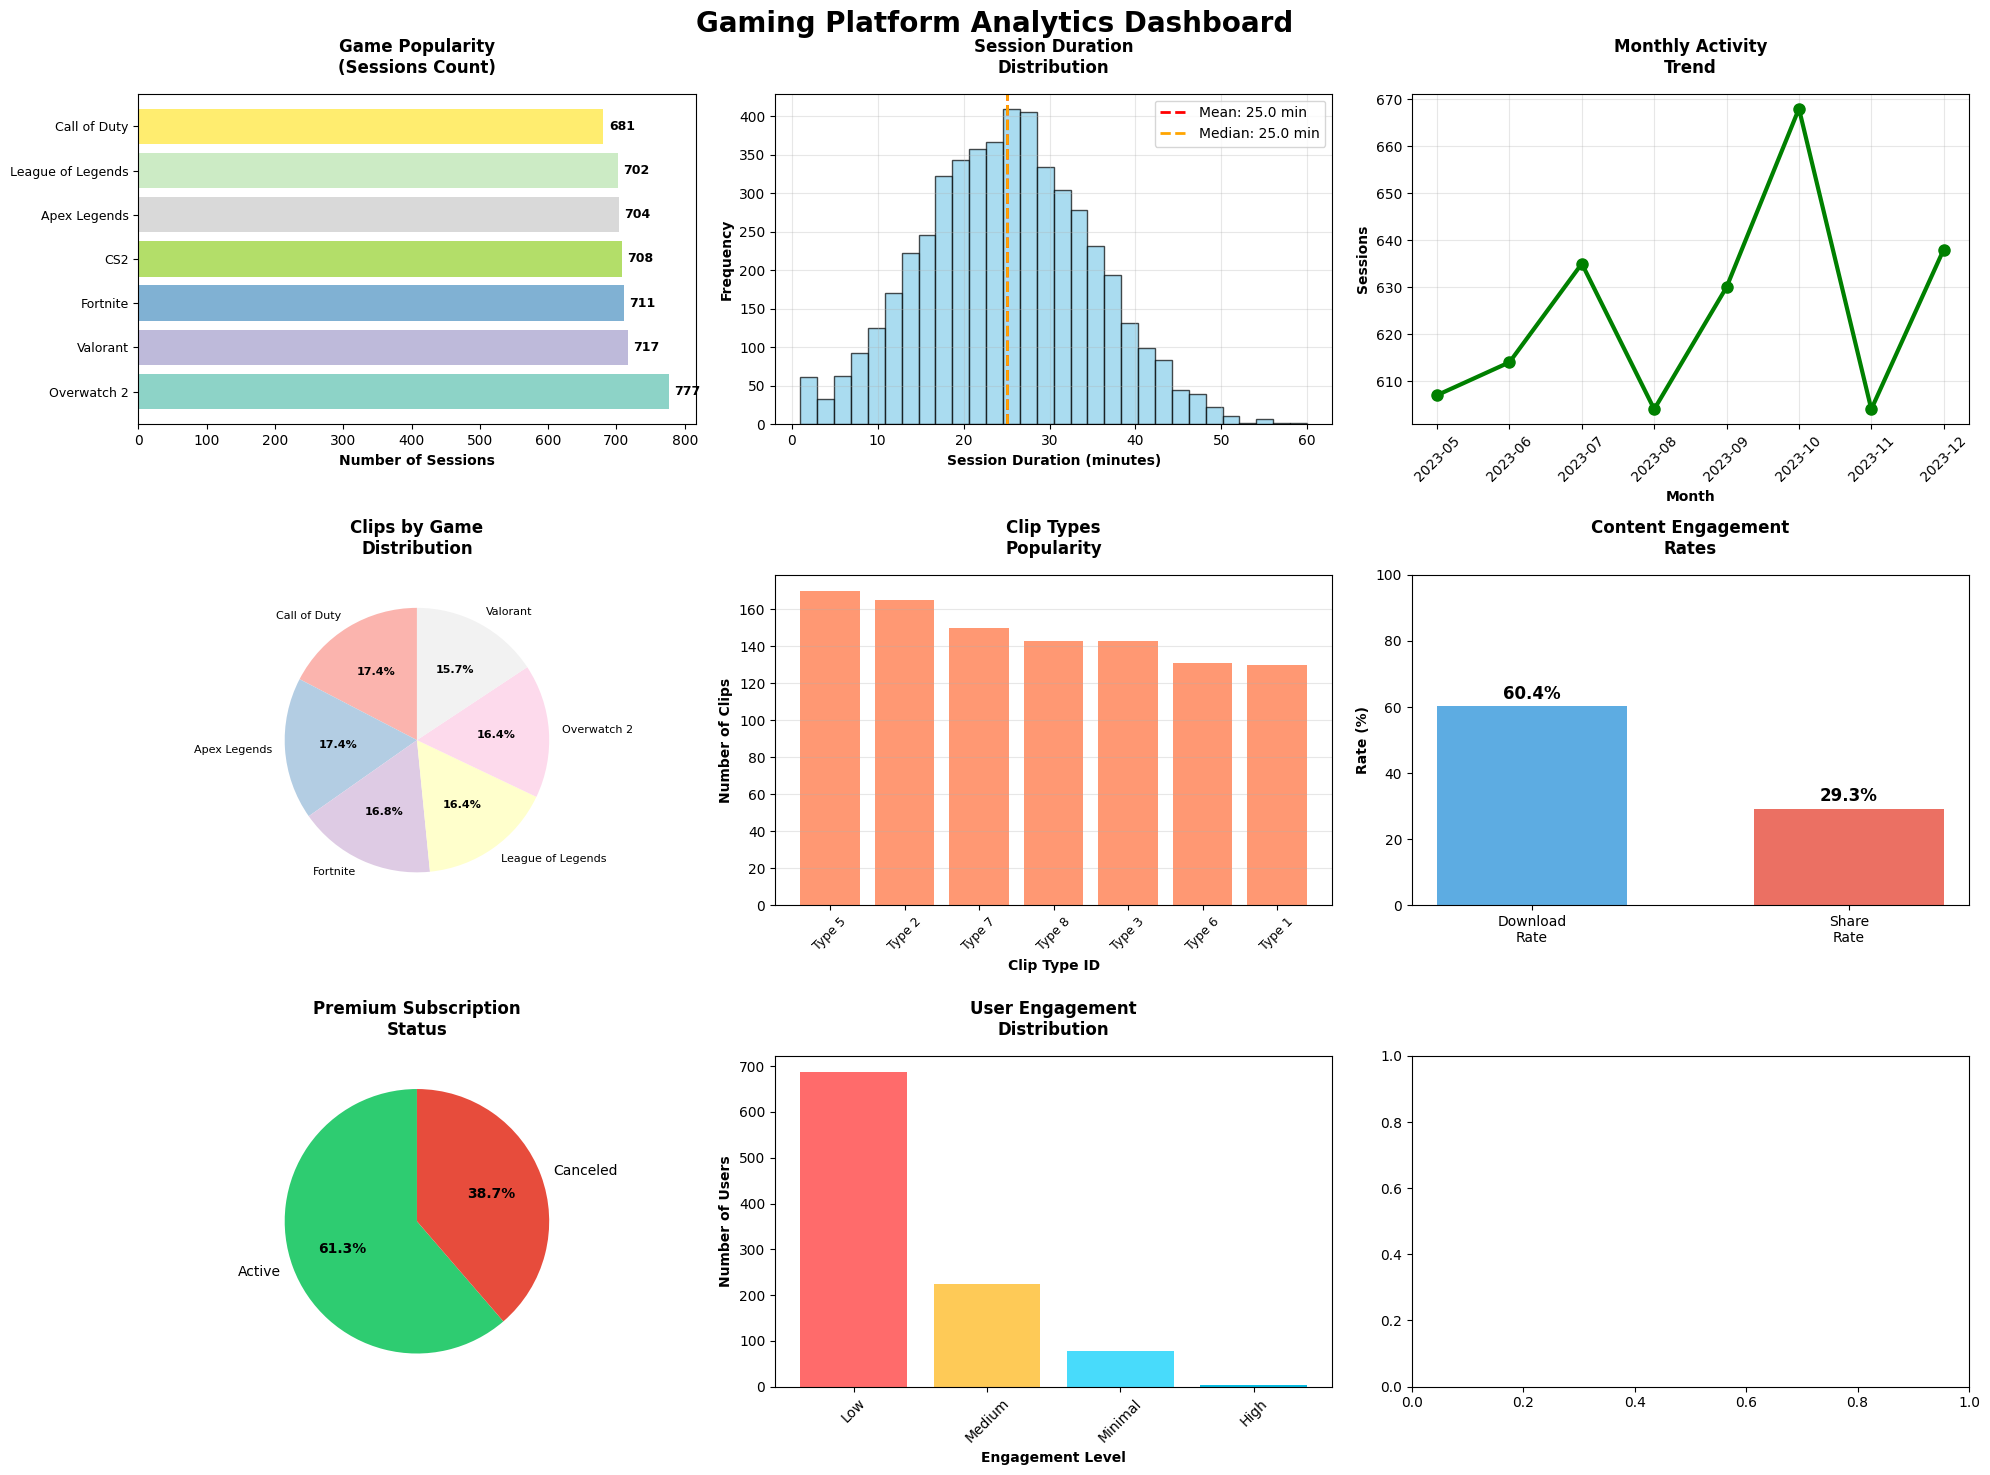

In [57]:
def create_gaming_dashboard():
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    fig.suptitle('Gaming Platform Analytics Dashboard', fontsize=20, fontweight='bold', y=0.98)

    # 1. Game Popularity
    ax1 = axes[0, 0]
    if 'game_name' in gamesession_df.columns:
        game_counts = gamesession_df['game_name'].value_counts().head(8)
        colors = plt.cm.Set3(np.linspace(0, 1, len(game_counts)))
        bars = ax1.barh(range(len(game_counts)), game_counts.values, color=colors)
        ax1.set_yticks(range(len(game_counts)))
        ax1.set_yticklabels(game_counts.index, fontsize=9)
        ax1.set_xlabel('Number of Sessions', fontweight='bold')
        ax1.set_title('Game Popularity\n(Sessions Count)', fontweight='bold', pad=15)

        # Add value labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax1.text(width + max(game_counts)*0.01, bar.get_y() + bar.get_height()/2,
                     f'{int(width):,}', ha='left', va='center', fontweight='bold', fontsize=9)

    # 2. Session Duration Distribution
    ax2 = axes[0, 1]
    if 'duration_minutes' in gamesession_df.columns:
        duration_clean = gamesession_df['duration_minutes'].dropna()
        duration_clean = duration_clean[(duration_clean > 0) & (duration_clean < 300)]  # Remove outliers

        ax2.hist(duration_clean, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        ax2.axvline(duration_clean.mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {duration_clean.mean():.1f} min')
        ax2.axvline(duration_clean.median(), color='orange', linestyle='--', linewidth=2,
                   label=f'Median: {duration_clean.median():.1f} min')
        ax2.set_xlabel('Session Duration (minutes)', fontweight='bold')
        ax2.set_ylabel('Frequency', fontweight='bold')
        ax2.set_title('Session Duration\nDistribution', fontweight='bold', pad=15)
        ax2.legend()
        ax2.grid(alpha=0.3)

    # 3. User Activity Timeline
    ax3 = axes[0, 2]
    if 'submited_date' in gamesession_df.columns:
        gamesession_df['month'] = gamesession_df['submited_date'].dt.to_period('M')
        monthly_sessions = gamesession_df.groupby('month').size()

        x_pos = range(len(monthly_sessions))
        ax3.plot(x_pos, monthly_sessions.values, marker='o', linewidth=3, markersize=8, color='green')
        ax3.set_xticks(x_pos[::max(1, len(x_pos)//6)])
        ax3.set_xticklabels([str(m) for m in monthly_sessions.index[::max(1, len(x_pos)//6)]], rotation=45)
        ax3.set_xlabel('Month', fontweight='bold')
        ax3.set_ylabel('Sessions', fontweight='bold')
        ax3.set_title('Monthly Activity\nTrend', fontweight='bold', pad=15)
        ax3.grid(alpha=0.3)

    # 4. Clip Creation Analysis
    ax4 = axes[1, 0]
    if len(clips_df) > 0:
        if 'game_name' in clips_df.columns:
            clip_games = clips_df['game_name'].value_counts().head(6)
            colors = plt.cm.Pastel1(np.linspace(0, 1, len(clip_games)))
            wedges, texts, autotexts = ax4.pie(clip_games.values, labels=clip_games.index,
                                              autopct='%1.1f%%', colors=colors, startangle=90)
            ax4.set_title('Clips by Game\nDistribution', fontweight='bold', pad=15)

            for text in texts:
                text.set_fontsize(8)
            for autotext in autotexts:
                autotext.set_fontsize(8)
                autotext.set_fontweight('bold')

    # 5. Clip Types Performance
    ax5 = axes[1, 1]
    if 'clip_type_id' in clips_df.columns:
        clip_types = clips_df['clip_type_id'].value_counts().head(8)
        ax5.bar(range(len(clip_types)), clip_types.values, color='coral', alpha=0.8)
        ax5.set_xticks(range(len(clip_types)))
        ax5.set_xticklabels([f'Type {t}' for t in clip_types.index], rotation=45, fontsize=9)
        ax5.set_xlabel('Clip Type ID', fontweight='bold')
        ax5.set_ylabel('Number of Clips', fontweight='bold')
        ax5.set_title('Clip Types\nPopularity', fontweight='bold', pad=15)
        ax5.grid(axis='y', alpha=0.3)

    # 6. Content Engagement Rates
    ax6 = axes[1, 2]
    if len(clips_df) > 0 and len(downloaded_clips_df) > 0:
        total_clips = len(clips_df)
        total_downloads = len(downloaded_clips_df)
        total_shares = len(shared_clips_df) if len(shared_clips_df) > 0 else 0

        unique_downloaded = downloaded_clips_df['clip_id'].nunique() if 'clip_id' in downloaded_clips_df.columns else 0
        unique_shared = shared_clips_df['clip_id'].nunique() if len(shared_clips_df) > 0 and 'clip_id' in shared_clips_df.columns else 0

        download_rate = (unique_downloaded / total_clips * 100) if total_clips > 0 else 0
        share_rate = (unique_shared / total_clips * 100) if total_clips > 0 else 0

        categories = ['Download\nRate', 'Share\nRate']
        rates = [download_rate, share_rate]
        colors = ['#3498db', '#e74c3c']

        bars = ax6.bar(categories, rates, color=colors, alpha=0.8, width=0.6)
        ax6.set_ylabel('Rate (%)', fontweight='bold')
        ax6.set_title('Content Engagement\nRates', fontweight='bold', pad=15)
        ax6.set_ylim(0, max(100, max(rates) * 1.1))

        for bar, rate in zip(bars, rates):
            height = bar.get_height()
            ax6.text(bar.get_x() + bar.get_width()/2., height + 1,
                     f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)


    # 7. Premium Analysis
    ax7 = axes[2, 0]
    if len(premium_df) > 0:
        premium_df['is_canceled'] = premium_df['canceled_at'].notna()
        status_counts = premium_df['is_canceled'].value_counts()

        labels = ['Active', 'Canceled']
        colors = ['#2ecc71', '#e74c3c']
        sizes = [status_counts.get(False, 0), status_counts.get(True, 0)]

        wedges, texts, autotexts = ax7.pie(sizes, labels=labels, autopct='%1.1f%%',
                                          colors=colors, startangle=90)
        ax7.set_title('Premium Subscription\nStatus', fontweight='bold', pad=15)

        for autotext in autotexts:
            autotext.set_fontweight('bold')
            autotext.set_fontsize(10)

    # 8. User Engagement Levels
    ax8 = axes[2, 1]
    user_sessions = gamesession_df['user_id'].value_counts() if len(gamesession_df) > 0 else pd.Series()
    user_clips = clips_df['user_id'].value_counts() if len(clips_df) > 0 else pd.Series()

    engagement_categories = []
    all_users = set(gamesession_df['user_id'].unique() if len(gamesession_df) > 0 else [])

    for user_id in all_users:
        sessions = user_sessions.get(user_id, 0)
        clips = user_clips.get(user_id, 0)
        total_activity = sessions + clips * 2

        if total_activity >= 20:
            engagement_categories.append('High')
        elif total_activity >= 10:
            engagement_categories.append('Medium')
        elif total_activity >= 3:
            engagement_categories.append('Low')
        else:
            engagement_categories.append('Minimal')

    if engagement_categories:
        engagement_counts = pd.Series(engagement_categories).value_counts()
        colors = ['#ff6b6b', '#feca57', '#48dbfb', '#0abde3']
        ax8.bar(engagement_counts.index, engagement_counts.values, color=colors[:len(engagement_counts)])
        ax8.set_xlabel('Engagement Level', fontweight='bold')
        ax8.set_ylabel('Number of Users', fontweight='bold')
        ax8.set_title('User Engagement\nDistribution', fontweight='bold', pad=15)
        ax8.tick_params(axis='x', rotation=45)

    # 9. Platform Growth Metrics
    ax9 = axes[2, 2]
    if 'join_at' in gamesession_df.columns:
        join_dates = pd.to_datetime(gamesession_df['join_at']).dropna()
        join_dates = join_dates.dt.to_period('M')
        monthly_joins = join_dates.value_counts().sort_index()

        if len(monthly_joins) > 0:
            x_pos = range(len(monthly_joins))
            ax9.fill_between(x_pos, monthly_joins.values, alpha=0.7, color='purple')
            ax9.plot(x_pos, monthly_joins.values, color='darkpurple', linewidth=2, marker='o')
            ax9.set_xticks(x_pos[::max(1, len(x_pos)//4)])
            ax9.set_xticklabels([str(m) for m in monthly_joins.index[::max(1, len(x_pos)//4)]], rotation=45)
            ax9.set_xlabel('Month', fontweight='bold')
            ax9.set_ylabel('New Users', fontweight='bold')
            ax9.set_title('User Acquisition\nTrend', fontweight='bold', pad=15)
            ax9.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    return fig

dashboard_fig = create_gaming_dashboard()


### 5. DETAILED STATISTICAL ANALYSIS

In [54]:
def detailed_statistical_analysis():
    # Basic statistics
    print("📊 PLATFORM OVERVIEW:")
    print("-" * 25)

    total_users = gamesession_df['user_id'].nunique() if len(gamesession_df) > 0 else 0
    total_sessions = len(gamesession_df)
    total_clips = len(clips_df)
    total_downloads = len(downloaded_clips_df)
    total_shares = len(shared_clips_df)
    total_premium = len(premium_df)

    print(f"   • Total Users: {total_users:,}")
    print(f"   • Total Sessions: {total_sessions:,}")
    print(f"   • Total Clips: {total_clips:,}")
    print(f"   • Total Downloads: {total_downloads:,}")
    print(f"   • Total Shares: {total_shares:,}")
    print(f"   • Premium Users: {total_premium:,}")

    # Engagement rates
    if total_clips > 0:
        download_rate = (total_downloads / total_clips * 100)
        share_rate = (total_shares / total_clips * 100)
        print(f"   • Download Rate: {download_rate:.1f}%")
        print(f"   • Share Rate: {share_rate:.1f}%")

    # Premium conversion
    if total_users > 0:
        premium_conversion = (total_premium / total_users * 100)
        print(f"   • Premium Conversion: {premium_conversion:.1f}%")

    # Gaming behavior analysis
    print(f"\n🎮 GAMING BEHAVIOR:")
    print("-" * 25)

    if 'duration_minutes' in gamesession_df.columns:
        avg_session = gamesession_df['duration_minutes'].mean()
        median_session = gamesession_df['duration_minutes'].median()
        print(f"   • Average Session: {avg_session:.1f} minutes")
        print(f"   • Median Session: {median_session:.1f} minutes")

    # User activity patterns
    if total_users > 0:
        sessions_per_user = total_sessions / total_users
        clips_per_user = total_clips / total_users if total_clips > 0 else 0
        print(f"   • Sessions per User: {sessions_per_user:.1f}")
        print(f"   • Clips per User: {clips_per_user:.2f}")

    # Content creation analysis
    print(f"\n🎬 CONTENT CREATION:")
    print("-" * 25)

    if len(clips_df) > 0:
        clip_creators = clips_df['user_id'].nunique()
        creation_rate = (clip_creators / total_users * 100) if total_users > 0 else 0
        print(f"   • Content Creators: {clip_creators:,} ({creation_rate:.1f}%)")

        if 'duration_seconds' in clips_df.columns:
            avg_clip_duration = clips_df['duration_seconds'].mean()
            print(f"   • Average Clip Duration: {avg_clip_duration:.1f} seconds")

    # Premium analysis
    print(f"\n💎 PREMIUM ANALYSIS:")
    print("-" * 25)

    if len(premium_df) > 0:
        canceled_subs = premium_df['canceled_at'].notna().sum()
        active_subs = len(premium_df) - canceled_subs
        churn_rate = (canceled_subs / len(premium_df) * 100)

        print(f"   • Active Subscriptions: {active_subs:,}")
        print(f"   • Canceled Subscriptions: {canceled_subs:,}")
        print(f"   • Churn Rate: {churn_rate:.1f}%")

        # Subscription duration analysis
        if 'starts_at' in premium_df.columns and 'ends_at' in premium_df.columns:
            premium_df['sub_duration'] = (
                premium_df['ends_at'].fillna(pd.Timestamp.now()) - premium_df['starts_at']
            ).dt.days
            avg_sub_duration = premium_df['sub_duration'].mean()
            print(f"   • Average Subscription Duration: {avg_sub_duration:.0f} days")

detailed_statistical_analysis()


📊 PLATFORM OVERVIEW:
-------------------------
   • Total Users: 993
   • Total Sessions: 5,000
   • Total Clips: 1,032
   • Total Downloads: 623
   • Total Shares: 302
   • Premium Users: 150
   • Download Rate: 60.4%
   • Share Rate: 29.3%
   • Premium Conversion: 15.1%

🎮 GAMING BEHAVIOR:
-------------------------
   • Average Session: 25.0 minutes
   • Median Session: 25.0 minutes
   • Sessions per User: 5.0
   • Clips per User: 1.04

🎬 CONTENT CREATION:
-------------------------
   • Content Creators: 653 (65.8%)
   • Average Clip Duration: 30.0 seconds

💎 PREMIUM ANALYSIS:
-------------------------
   • Active Subscriptions: 92
   • Canceled Subscriptions: 58
   • Churn Rate: 38.7%
   • Average Subscription Duration: 474 days


### 6. INSIGHTS AND RECOMMENDATIONS

In [55]:
def generate_insights_and_recommendations():
    # Game performance insights
    if 'game_name' in gamesession_df.columns:
        top_game = gamesession_df['game_name'].value_counts().index[0]
        print(f"🏆 TOP PERFORMING GAME: {top_game}")

        # Clip creation by game
        if len(clips_df) > 0 and 'game_name' in clips_df.columns:
            game_clip_rates = {}
            for game in gamesession_df['game_name'].unique():
                game_sessions = len(gamesession_df[gamesession_df['game_name'] == game])
                game_clips = len(clips_df[clips_df['game_name'] == game])
                clip_rate = (game_clips / game_sessions * 100) if game_sessions > 0 else 0
                game_clip_rates[game] = clip_rate

            best_clip_game = max(game_clip_rates, key=game_clip_rates.get)
            print(f"🎬 BEST CLIP CREATION RATE: {best_clip_game} ({game_clip_rates[best_clip_game]:.1f}%)")

    print(f"\n💡 STRATEGIC RECOMMENDATIONS:")
    print("-" * 35)
    print("1. Focus marketing on top-performing games")
    print("2. Implement retention strategies for high-churn segments")
    print("3. Promote clip creation in underperforming games")
    print("4. Develop premium features based on user behavior patterns")
    print("5. Set up automated alerts for engagement rate drops")
    print("6. Optimize onboarding for new user retention")

    print(f"\n🔍 AREAS FOR DEEP DIVE ANALYSIS:")
    print("-" * 40)
    print("• User journey from registration to premium conversion")
    print("• Seasonal trends in gaming activity")
    print("• Content virality factors and sharing patterns")
    print("• Premium user behavior vs free user patterns")
    print("• Churn prediction modeling opportunities")

generate_insights_and_recommendations()

🏆 TOP PERFORMING GAME: Overwatch 2
🎬 BEST CLIP CREATION RATE: Call of Duty (22.8%)

💡 STRATEGIC RECOMMENDATIONS:
-----------------------------------
1. Focus marketing on top-performing games
2. Implement retention strategies for high-churn segments
3. Promote clip creation in underperforming games
4. Develop premium features based on user behavior patterns
5. Set up automated alerts for engagement rate drops
6. Optimize onboarding for new user retention

🔍 AREAS FOR DEEP DIVE ANALYSIS:
----------------------------------------
• User journey from registration to premium conversion
• Seasonal trends in gaming activity
• Content virality factors and sharing patterns
• Premium user behavior vs free user patterns
• Churn prediction modeling opportunities


## ANALYSIS FOR DUMMY DATA

- Mean of Monthly Active Users (MAU) during periode: 1045 user/month
- The highest MAU occurred in October 2023: 1204 user
- The lowest MAU occurred in July 2023: 912 user
- There were no active premium users during the period June–December 2023
- Monthly (MoM) MAU changes ranged from -12.46% until 15.23%


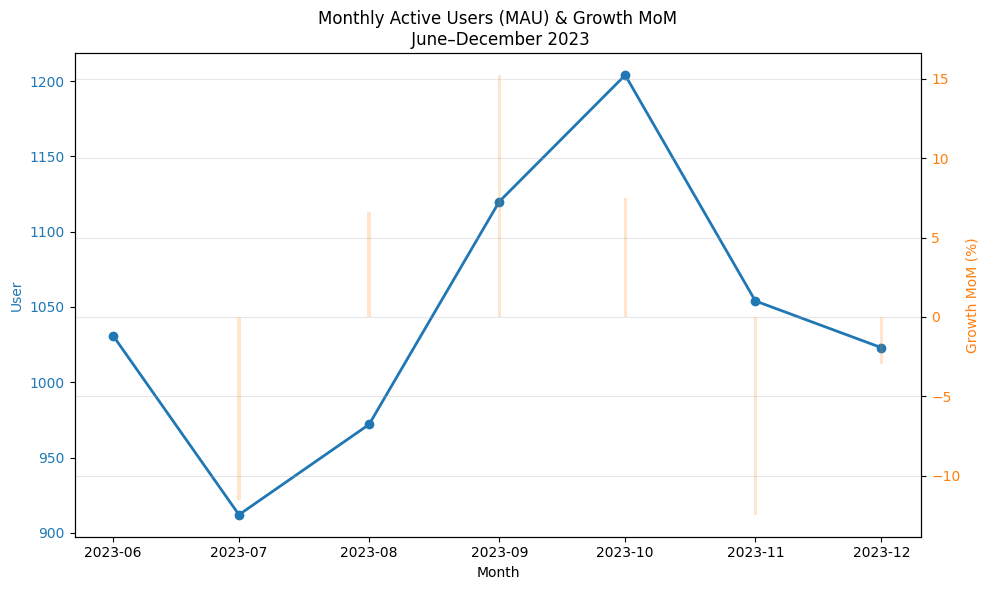

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "month": ["2023-06", "2023-07", "2023-08", "2023-09", "2023-10", "2023-11", "2023-12"],
    "total_mau": [1031, 912, 972, 1120, 1204, 1054, 1023],
    "premium_mau": [0, 0, 0, 0, 0, 0, 0],
    "free_mau": [1031, 912, 972, 1120, 1204, 1054, 1023]
}

df = pd.DataFrame(data)
df['month'] = pd.to_datetime(df['month'])

df['mau_growth_%'] = df['total_mau'].pct_change() * 100

avg_mau = df['total_mau'].mean()
peak_mau = df.loc[df['total_mau'].idxmax()]
low_mau = df.loc[df['total_mau'].idxmin()]

insights = [
    f"Mean of Monthly Active Users (MAU) during periode: {avg_mau:.0f} user/month",
    f"The highest MAU occurred in {peak_mau['month'].strftime('%B %Y')}: {peak_mau['total_mau']} user",
    f"The lowest MAU occurred in {low_mau['month'].strftime('%B %Y')}: {low_mau['total_mau']} user",
    f"There were no active premium users during the period June–December 2023",
    f"Monthly (MoM) MAU changes ranged from {df['mau_growth_%'].min():.2f}% until {df['mau_growth_%'].max():.2f}%",
]

print("\n".join(f"- {i}" for i in insights))

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df['month'], df['total_mau'], marker='o', color='tab:blue', label='Total MAU', linewidth=2)
ax1.set_xlabel('Month')
ax1.set_ylabel('User', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.bar(df['month'], df['mau_growth_%'], alpha=0.2, color='tab:orange', label='Growth (%)')
ax2.set_ylabel('Growth MoM (%)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Monthly Active Users (MAU) & Growth MoM\n June–December 2023")
fig.tight_layout()
plt.grid(alpha=0.3)
plt.show()


In [89]:
import pandas as pd

gamesession = pd.read_csv("gamesession.csv", parse_dates=['submited_date'])
clips = pd.read_csv("clips.csv", parse_dates=['created_at'])
downloaded_clips = pd.read_csv("downloaded_clips.csv", parse_dates=['created_at'])
shared_clips = pd.read_csv("shared_clips.csv", parse_dates=['created_at'])
premium = pd.read_csv("premium.csv", parse_dates=['starts_at', 'ends_at', 'canceled_at'])


In [90]:
start, end = '2023-05-01', '2023-12-31'
clips_f = clips[(clips['created_at'] >= start) & (clips['created_at'] <= end)]
downloads_f = downloaded_clips[(downloaded_clips['created_at'] >= start) & (downloaded_clips['created_at'] <= end)]
shares_f = shared_clips[(shared_clips['created_at'] >= start) & (shared_clips['created_at'] <= end)]

clip_activity = pd.concat([
    clips_f[['user_id','created_at']].assign(activity_type='upload'),
    downloads_f[['user_Id','created_at']].assign(activity_type='download'),
    shares_f[['user_id','created_at']].assign(activity_type='share')
])

clip_activity['month'] = clip_activity['created_at'].dt.to_period('M').astype(str)

monthly_clip = clip_activity.groupby(['user_id','month']).size().reset_index(name='total_clip_engagement')

def get_premium_status(user_id, month):
    month_start = pd.to_datetime(month + "-01")
    month_end = month_start + pd.offsets.MonthEnd(0)
    p = premium[premium['user_id'] == user_id]
    cond = (p['starts_at'] <= month_end) & \
           ((p['ends_at'] >= month_start) | p['ends_at'].isna()) & \
           ((p['canceled_at'].isna()) | (p['canceled_at'] > month_end))
    return 'Premium' if cond.any() else 'Free'

monthly_clip['premium_status'] = monthly_clip.apply(
    lambda x: get_premium_status(x['user_id'], x['month']), axis=1
)

clip_engagement_summary = monthly_clip.groupby(['month','premium_status']).agg(
    total_users=('user_id','nunique'),
    total_engagements=('total_clip_engagement','sum'),
    avg_engagement_per_user=('total_clip_engagement','mean')
).reset_index()

In [91]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
random.seed(42)

print("🎮 GAMING PLATFORM DATA ANALYSIS")
print("=" * 50)
print()

def random_dates(start, end, n):
    start_date = datetime.strptime(start, '%Y-%m-%d')
    end_date = datetime.strptime(end, '%Y-%m-%d')
    time_between = end_date - start_date
    days_between = time_between.days
    random_days = np.random.randint(0, days_between, n)
    return [start_date + timedelta(days=int(day)) for day in random_days]

# Dataset 1: GAMESESSION
print("📊 Dataset 1: GAMESESSION")
games = ['Valorant', 'CS2', 'Apex Legends', 'Fortnite', 'Call of Duty', 'Overwatch 2', 'League of Legends']
user_ids = list(range(1, 1001))  # 1000 users

gamesession_data = []
session_id = 1
for _ in range(5000):
    user_id = random.choice(user_ids)
    game = random.choice(games)
    duration = np.random.normal(25*60*1000, 10*60*1000)
    duration = max(60*1000, duration)
    submit_date = random.choice(random_dates('2023-05-01', '2023-12-31', 1))

    gamesession_data.append({
        'id': session_id,
        'user_id': user_id,
        'game_name': game,
        'duration': int(duration),
        'submited_date': submit_date.date()
    })
    session_id += 1

gamesession_df = pd.DataFrame(gamesession_data)
print(f"✅ Created {len(gamesession_df)} game sessions")
print(f"   Games: {', '.join(games)}")
print(f"   Users: {len(gamesession_df['user_id'].unique())} unique users")
print()

# Dataset 2: CLIPS
print("📊 Dataset 2: CLIPS")
clip_types = {
    1: 'Horizontal AI Highlight',
    2: 'TikTok Converted',
    3: 'Trimmed Clips',
    5: 'Eventful Highlights',
    6: 'Weekly Montage',
    7: 'Local Upload',
    8: 'YouTube Vertical'
}

clips_data = []
clip_id = 1
for session in gamesession_data[:2500]:
    if random.random() < 0.4:
        clip_type_id = random.choice(list(clip_types.keys()))
        duration = np.random.normal(30, 15)
        duration = max(5, duration)
        created_at = session['submited_date'] + timedelta(hours=random.randint(0, 24))

        clips_data.append({
            'id': clip_id,
            'user_id': session['user_id'],
            'gamesession_id': session['id'],
            'clip_type_id': clip_type_id,
            'game_name': session['game_name'],
            'duration': duration,
            'created_at': created_at
        })
        clip_id += 1

clips_df = pd.DataFrame(clips_data)
print(f"✅ Created {len(clips_df)} clips")
print(f"   Clip types: {len(clip_types)} different types")
print(f"   Creators: {len(clips_df['user_id'].unique())} unique users")
print()

# Dataset 3: DOWNLOADED_CLIPS
print("📊 Dataset 3: DOWNLOADED_CLIPS")
downloaded_clips_data = []
download_id = 1
for clip in clips_data:
    if random.random() < 0.6:
        # Sometimes downloaded by creator, sometimes by others
        if random.random() < 0.7:
            downloader = clip['user_id']
        else:
            downloader = random.choice(user_ids)

        download_date = clip['created_at'] + timedelta(days=random.randint(0, 30))

        downloaded_clips_data.append({
            'id': download_id,
            'user_id': downloader,
            'clip_id': clip['id'],
            'created_at': download_date
        })
        download_id += 1

downloaded_clips_df = pd.DataFrame(downloaded_clips_data)
print(f"✅ Created {len(downloaded_clips_df)} downloads")
print(f"   Download rate: {len(downloaded_clips_df)/len(clips_df)*100:.1f}%")
print()

# Dataset 4: SHARED_CLIPS
print("📊 Dataset 4: SHARED_CLIPS")
shared_clips_data = []
share_id = 1
for clip in clips_data:
    if random.random() < 0.3:
        # Usually shared by creator
        if random.random() < 0.8:
            sharer = clip['user_id']  # Creator shares own clip
        else:
            sharer = random.choice(user_ids)

        share_date = clip['created_at'] + timedelta(days=random.randint(0, 15))

        shared_clips_data.append({
            'id': share_id,
            'user_id': sharer,
            'clip_id': clip['id'],
            'created_at': share_date
        })
        share_id += 1

shared_clips_df = pd.DataFrame(shared_clips_data)
print(f"✅ Created {len(shared_clips_df)} shares")
print(f"   Share rate: {len(shared_clips_df)/len(clips_df)*100:.1f}%")
print()

# Dataset 5: PREMIUM
print("📊 Dataset 5: PREMIUM")
premium_data = []
premium_id = 1
premium_users = random.sample(user_ids, 150)

for user_id in premium_users:
    start_date = random.choice(random_dates('2023-05-01', '2023-11-30', 1))
    if random.random() < 0.3:
        cancel_date = start_date + timedelta(days=random.randint(7, 90))
        end_date = cancel_date + timedelta(days=random.randint(0, 7))

        premium_data.append({
            'id': premium_id,
            'user_id': user_id,
            'starts_at': start_date.date(),
            'ends_at': end_date.date(),
            'canceled_at': cancel_date.date()
        })
    else:
        premium_data.append({
            'id': premium_id,
            'user_id': user_id,
            'starts_at': start_date.date(),
            'ends_at': None,
            'canceled_at': None
        })

    premium_id += 1

premium_df = pd.DataFrame(premium_data)
print(f"✅ Created {len(premium_df)} premium subscriptions")
print(f"   Premium users: {len(premium_users)} ({len(premium_users)/len(user_ids)*100:.1f}% of total users)")
print()

🎮 GAMING PLATFORM DATA ANALYSIS

📊 Dataset 1: GAMESESSION
✅ Created 5000 game sessions
   Games: Valorant, CS2, Apex Legends, Fortnite, Call of Duty, Overwatch 2, League of Legends
   Users: 993 unique users

📊 Dataset 2: CLIPS
✅ Created 1032 clips
   Clip types: 7 different types
   Creators: 653 unique users

📊 Dataset 3: DOWNLOADED_CLIPS
✅ Created 623 downloads
   Download rate: 60.4%

📊 Dataset 4: SHARED_CLIPS
✅ Created 302 shares
   Share rate: 29.3%

📊 Dataset 5: PREMIUM
✅ Created 150 premium subscriptions
   Premium users: 150 (15.0% of total users)



In [92]:
print("🔍 ANALYSIS 1: CLIP ENGAGEMENT ANALYSIS")
print("=" * 50)

clips_df['created_at'] = pd.to_datetime(clips_df['created_at'])
downloaded_clips_df['created_at'] = pd.to_datetime(downloaded_clips_df['created_at'])
shared_clips_df['created_at'] = pd.to_datetime(shared_clips_df['created_at'])

clip_activity = []

for _, clip in clips_df.iterrows():
    if '2023-05-01' <= clip['created_at'].strftime('%Y-%m-%d') <= '2023-12-31':
        clip_activity.append({
            'user_id': clip['user_id'],
            'activity_date': clip['created_at'].date(),
            'activity_type': 'upload'
        })

for _, download in downloaded_clips_df.iterrows():
    if '2023-05-01' <= download['created_at'].strftime('%Y-%m-%d') <= '2023-12-31':
        clip_activity.append({
            'user_id': download['user_id'],
            'activity_date': download['created_at'].date(),
            'activity_type': 'download'
        })

for _, share in shared_clips_df.iterrows():
    if '2023-05-01' <= share['created_at'].strftime('%Y-%m-%d') <= '2023-12-31':
        clip_activity.append({
            'user_id': share['user_id'],
            'activity_date': share['created_at'].date(),
            'activity_type': 'share'
        })

clip_activity_df = pd.DataFrame(clip_activity)

clip_activity_df['month'] = pd.to_datetime(clip_activity_df['activity_date']).dt.strftime('%Y-%m')
monthly_engagement = clip_activity_df.groupby(['user_id', 'month']).size().reset_index(name='total_clip_engagement')

def get_premium_status(user_id, month):
    user_premiums = premium_df[premium_df['user_id'] == user_id]
    if user_premiums.empty:
        return 'Free'

    month_start = pd.to_datetime(f"{month}-01")
    month_end = pd.to_datetime(f"{month}-01") + pd.offsets.MonthEnd(0)

    for _, premium in user_premiums.iterrows():
        start = pd.to_datetime(premium['starts_at'])
        end = pd.to_datetime(premium['ends_at']) if premium['ends_at'] else pd.to_datetime('2023-12-31')
        canceled = pd.to_datetime(premium['canceled_at']) if premium['canceled_at'] else None

        if start <= month_end and end >= month_start:
            if canceled is None or canceled > month_end:
                return 'Premium'

    return 'Free'

monthly_engagement['premium_status'] = monthly_engagement.apply(
    lambda row: get_premium_status(row['user_id'], row['month']), axis=1
)

engagement_summary = monthly_engagement.groupby(['month', 'premium_status']).agg({
    'user_id': 'nunique',
    'total_clip_engagement': ['sum', 'mean']
}).round(2)

engagement_summary.columns = ['total_users', 'total_engagements', 'avg_engagement_per_user']
engagement_summary = engagement_summary.reset_index()

print("Monthly Clip Engagement by Premium Status:")
print(engagement_summary.to_string(index=False))
print()


🔍 ANALYSIS 1: CLIP ENGAGEMENT ANALYSIS
Monthly Clip Engagement by Premium Status:
  month premium_status  total_users  total_engagements  avg_engagement_per_user
2023-05           Free          132                188                     1.42
2023-05        Premium            3                  3                     1.00
2023-06           Free          146                204                     1.40
2023-06        Premium            7                  8                     1.14
2023-07           Free          154                223                     1.45
2023-07        Premium            9                 16                     1.78
2023-08           Free          164                239                     1.46
2023-08        Premium           17                 26                     1.53
2023-09           Free          150                201                     1.34
2023-09        Premium           14                 23                     1.64
2023-10           Free          174   

In [93]:
print("🔍 ANALYSIS 2: GAME PERFORMANCE SUMMARY")
print("=" * 50)

gamesession_df['submited_date'] = pd.to_datetime(gamesession_df['submited_date'])

game_sessions_filtered = gamesession_df[
    (gamesession_df['submited_date'] >= '2023-05-01') &
    (gamesession_df['submited_date'] <= '2023-12-31')
]

game_performance = []
for game in games:
    game_sessions = game_sessions_filtered[game_sessions_filtered['game_name'] == game]
    game_clips = clips_df[clips_df['game_name'] == game]

    total_users = game_sessions['user_id'].nunique()
    clip_creators = game_clips['user_id'].nunique()

    game_user_ids = game_sessions['user_id'].unique()
    premium_users_count = len([uid for uid in game_user_ids if uid in premium_df['user_id'].values])

    avg_session_minutes = (game_sessions['duration'].mean() / 60000) if not game_sessions.empty else 0
    clip_creation_rate = (clip_creators / total_users * 100) if total_users > 0 else 0
    premium_conversion_rate = (premium_users_count / total_users * 100) if total_users > 0 else 0

    game_performance.append({
        'game_name': game,
        'total_users': total_users,
        'clip_creators': clip_creators,
        'premium_users': premium_users_count,
        'avg_session_minutes': round(avg_session_minutes, 2),
        'clip_creation_rate': round(clip_creation_rate, 2),
        'premium_conversion_rate': round(premium_conversion_rate, 2)
    })

game_performance_df = pd.DataFrame(game_performance).sort_values('total_users', ascending=False)
print("Game Performance Summary:")
print(game_performance_df.to_string(index=False))
print()


🔍 ANALYSIS 2: GAME PERFORMANCE SUMMARY
Game Performance Summary:
        game_name  total_users  clip_creators  premium_users  avg_session_minutes  clip_creation_rate  premium_conversion_rate
      Overwatch 2          541            136             89                24.74               25.14                    16.45
         Fortnite          516            143             83                25.53               27.71                    16.09
              CS2          510            134             72                24.30               26.27                    14.12
     Apex Legends          508            145             68                25.35               28.54                    13.39
         Valorant          505            130             79                24.64               25.74                    15.64
League of Legends          492            139             71                25.17               28.25                    14.43
     Call of Duty          486            146 

In [94]:
print("🔍 ANALYSIS 3: CLIP PERFORMANCE ANALYSIS")
print("=" * 50)

clips_filtered = clips_df[
    (clips_df['created_at'] >= '2023-05-01') &
    (clips_df['created_at'] <= '2023-12-31')
]

clip_performance = []
for clip_type_id in clip_types.keys():
    for game in games:
        clips_subset = clips_filtered[
            (clips_filtered['clip_type_id'] == clip_type_id) &
            (clips_filtered['game_name'] == game)
        ]

        if len(clips_subset) < 10:
            continue

        total_clips = len(clips_subset)
        clip_ids = clips_subset['id'].tolist()

        downloaded_clips_count = len(downloaded_clips_df[downloaded_clips_df['clip_id'].isin(clip_ids)]['clip_id'].unique())
        shared_clips_count = len(shared_clips_df[shared_clips_df['clip_id'].isin(clip_ids)]['clip_id'].unique())

        avg_duration = clips_subset['duration'].mean()
        download_rate = (downloaded_clips_count / total_clips * 100) if total_clips > 0 else 0
        share_rate = (shared_clips_count / total_clips * 100) if total_clips > 0 else 0

        clip_performance.append({
            'clip_type_id': clip_type_id,
            'clip_type_name': clip_types[clip_type_id],
            'game_name': game,
            'total_clips': total_clips,
            'downloaded_clips': downloaded_clips_count,
            'shared_clips': shared_clips_count,
            'avg_clip_duration_seconds': round(avg_duration, 2),
            'download_rate': round(download_rate, 2),
            'share_rate': round(share_rate, 2)
        })

clip_performance_df = pd.DataFrame(clip_performance).sort_values(['download_rate', 'share_rate'], ascending=[False, False])
print("Top Clip Performance (by download & share rates):")
print(clip_performance_df.head(10).to_string(index=False))
print()


🔍 ANALYSIS 3: CLIP PERFORMANCE ANALYSIS
Top Clip Performance (by download & share rates):
 clip_type_id          clip_type_name         game_name  total_clips  downloaded_clips  shared_clips  avg_clip_duration_seconds  download_rate  share_rate
            3           Trimmed Clips      Call of Duty           26                22             8                      31.39          84.62       30.77
            7            Local Upload               CS2           29                23             8                      27.43          79.31       27.59
            1 Horizontal AI Highlight          Fortnite           14                11             2                      26.15          78.57       14.29
            6          Weekly Montage       Overwatch 2           18                14             5                      25.52          77.78       27.78
            6          Weekly Montage      Apex Legends           26                20             7                      34.46        

In [95]:
print("🔍 ANALYSIS 4: PREMIUM REVENUE AND CHURN ANALYSIS")
print("=" * 50)

premium_df['starts_at'] = pd.to_datetime(premium_df['starts_at'])
premium_df['ends_at'] = pd.to_datetime(premium_df['ends_at'])
premium_df['canceled_at'] = pd.to_datetime(premium_df['canceled_at'])

premium_filtered = premium_df[
    (premium_df['starts_at'] >= '2023-05-01') &
    (premium_df['starts_at'] <= '2023-12-31')
]

premium_analysis = []
for month in pd.date_range('2023-05', '2023-12', freq='MS').strftime('%Y-%m'):
    month_premiums = premium_filtered[premium_filtered['starts_at'].dt.strftime('%Y-%m') == month]

    if month_premiums.empty:
        continue

    new_premium_users = len(month_premiums)
    active_premium = len(month_premiums[month_premiums['canceled_at'].isna()])
    canceled_premium = len(month_premiums[month_premiums['canceled_at'].notna()])

    sub_days = []
    for _, premium in month_premiums.iterrows():
        end_date = premium['ends_at'] if premium['ends_at'] else pd.to_datetime('2023-12-31')
        days = (end_date - premium['starts_at']).days
        sub_days.append(days)
    avg_subscription_days = np.mean(sub_days) if sub_days else 0

    premium_user_ids = month_premiums['user_id'].tolist()

    premium_sessions = 0
    premium_clips = 0
    premium_downloads = 0
    clips_per_user = []

    for user_id in premium_user_ids:
        user_premium = month_premiums[month_premiums['user_id'] == user_id].iloc[0]
        start_date = pd.to_datetime(user_premium['starts_at'])
        end_date = pd.to_datetime(user_premium['ends_at']) if user_premium['ends_at'] else pd.to_datetime('2023-12-31')

        user_sessions = gamesession_df[
            (gamesession_df['user_id'] == user_id) &
            (gamesession_df['submited_date'] >= start_date) &
            (gamesession_df['submited_date'] <= end_date)
        ]
        if not user_sessions.empty:
            premium_sessions += 1

        user_clips = clips_df[
            (clips_df['user_id'] == user_id) &
            (clips_df['created_at'] >= start_date) &
            (clips_df['created_at'] <= end_date)
        ]
        if not user_clips.empty:
            premium_clips += 1
            clips_per_user.append(len(user_clips))

        user_downloads = downloaded_clips_df[
            (downloaded_clips_df['user_id'] == user_id) &
            (downloaded_clips_df['created_at'] >= start_date) &
            (downloaded_clips_df['created_at'] <= end_date)
        ]
        if not user_downloads.empty:
            premium_downloads += 1

    avg_clips_per_user = np.mean(clips_per_user) if clips_per_user else 0
    cancellation_rate = (canceled_premium / new_premium_users * 100) if new_premium_users > 0 else 0

    premium_analysis.append({
        'month': month,
        'new_premium_users': new_premium_users,
        'active_premium': active_premium,
        'canceled_premium': canceled_premium,
        'avg_subscription_days': round(avg_subscription_days, 1),
        'premium_users_with_sessions': premium_sessions,
        'premium_users_with_clips': premium_clips,
        'premium_users_downloading': premium_downloads,
        'avg_clips_per_premium_user': round(avg_clips_per_user, 1),
        'cancellation_rate': round(cancellation_rate, 2)
    })

premium_analysis_df = pd.DataFrame(premium_analysis).sort_values('month', ascending=False)
print("Premium Revenue and Churn Analysis:")
print(premium_analysis_df.to_string(index=False))
print()

🔍 ANALYSIS 4: PREMIUM REVENUE AND CHURN ANALYSIS
Premium Revenue and Churn Analysis:
  month  new_premium_users  active_premium  canceled_premium  avg_subscription_days  premium_users_with_sessions  premium_users_with_clips  premium_users_downloading  avg_clips_per_premium_user  cancellation_rate
2023-11                 16              14                 2                    NaN                            1                         0                          1                         0.0              12.50
2023-10                 13              10                 3                    NaN                            0                         0                          0                         0.0              23.08
2023-09                 20              12                 8                    NaN                            6                         1                          3                         2.0              40.00
2023-08                 25              14                11   

In [96]:
print("🔍 ANALYSIS 5: DOWNLOAD RATE MONITORING ALERTS")
print("=" * 50)

daily_alerts = []
clips_filtered['date'] = clips_filtered['created_at'].dt.date

for date in clips_filtered['date'].unique():
    daily_clips = clips_filtered[clips_filtered['date'] == date]
    clip_ids_daily = daily_clips['id'].tolist()

    clips_created = len(daily_clips)
    clips_downloaded = len(downloaded_clips_df[downloaded_clips_df['clip_id'].isin(clip_ids_daily)]['clip_id'].unique())

    download_rate = (clips_downloaded / clips_created * 100) if clips_created > 0 else 0

    # Alert if download rate drops below 30%
    if download_rate < 30.0:
        daily_alerts.append({
            'alert_type': 'Download Rate Alert',
            'date': date,
            'clips_created': clips_created,
            'clips_downloaded': clips_downloaded,
            'download_rate': round(download_rate, 2)
        })

daily_alerts_df = pd.DataFrame(daily_alerts).sort_values('date', ascending=False)

if not daily_alerts_df.empty:
    print("🚨 ALERTS: Days with download rate below 30%:")
    print(daily_alerts_df.head(10).to_string(index=False))
else:
    print("✅ No download rate alerts - all days above 30% threshold")

print()


🔍 ANALYSIS 5: DOWNLOAD RATE MONITORING ALERTS
🚨 ALERTS: Days with download rate below 30%:
         alert_type       date  clips_created  clips_downloaded  download_rate
Download Rate Alert 2023-12-30              5                 1           20.0
Download Rate Alert 2023-12-12              3                 0            0.0
Download Rate Alert 2023-12-03              4                 1           25.0
Download Rate Alert 2023-11-25              2                 0            0.0
Download Rate Alert 2023-11-23              4                 1           25.0
Download Rate Alert 2023-11-22              5                 1           20.0
Download Rate Alert 2023-11-09              3                 0            0.0
Download Rate Alert 2023-11-08              1                 0            0.0
Download Rate Alert 2023-10-28              4                 1           25.0
Download Rate Alert 2023-10-27              4                 1           25.0

